In [37]:
import cv2
import math
import matplotlib.pyplot as plt
from random import randrange

In [38]:
def ret_gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    return gray

In [39]:
 # convert to grayscale
def ret_edges(gray, threshold1=60, threshold2=100, apertureSize=3):
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize=apertureSize) # detect edges
    plt.imshow(edges)
    return edges

In [40]:
def ret_lines(edges, minLineLength, maxLineGap):
        lines = cv2.HoughLinesP(
                edges,
                1,
                math.pi/360,
                80,
                minLineLength=minLineLength,
                maxLineGap=maxLineGap,
        ) # detect lines
        return lines

In [74]:
def rmvExcessLines(lines):
    slopes = []
    Y_intercepts = []
    newLines = []

    for i in range(len(lines)):
        x1, y1, x2, y2 = lines[i][0]

        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)

        y_intercept = y1 - (x1*slope)
        Y_intercepts.append(y_intercept)


        y_intercepts = [y for _,y in sorted(zip(slopes,Y_intercepts))]
        slopes.sort()
        closeto = False
        ratioTolerance = 0.95
        
        for j in range(1, len(slopes)):
            ratio = (slopes[j-1]/slope, (y_intercepts[j-1]/y_intercept))
            if ratio[0] > ratioTolerance and ratio[1] > ratioTolerance:
                slopes.remove(slope)
                closeto = True
                break
        if not closeto:
            newLines.append(lines[i])
            #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            #cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), cv2.LINE_4)
            closeto = False
    return newLines

In [42]:
def detect_lines(img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10):
    gray = ret_gray(img)
    edges = ret_edges(gray, threshold1, threshold2, apertureSize)
    lines = ret_lines(edges, minLineLength, maxLineGap)
    lineList = rmvExcessLines(lines)
    return lineList

In [58]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1)/(x2-x1)
        cv2.line(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, color, cv2.LINE_4)
    plt.imshow(img)
    plt.show()
    return img

In [44]:
def get_slopes_intercepts(lines):
    slopes = []
    x_intercepts = []
    for line in lines:
        x1, y1, x2, y2 = line[0]

        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)

        x_intercept = -(y1 - (x1*slope))/slope
        x_intercepts.append(x_intercept)
    return slopes, x_intercepts

In [60]:
def detect_lanes(lines):
    slopeList, xInterceptList = get_slopes_intercepts(lines)
    lanes = []
    #check of the lines intersect on the screen
    if len(slopeList)> 1:
        for i in range(0,len(slopeList)):
            for j in range (i+1,len(slopeList)):
                
                InterceptDist = abs(xInterceptList[i]-xInterceptList[j])
                slopeDiff = abs(1/ slopeList[i]-1 /slopeList[j]) 
                if(InterceptDist > 100 and InterceptDist< 10000 and slopeDiff< 1):
                    lane1 = lines[i][0]
                    lane2 = lines[j][0]
                    addedlanes = [lane1,lane2]
                    lanes.append(addedlanes)
    return lanes


In [72]:
def draw_lanes(img, lanes):
    for lane in lanes:
        color = (randrange(255),randrange(255),randrange(255))
        for i in range(2):
            x1, y1, x2, y2 = lane[i]
            slope = (y2-y1)/(x2-x1)
            cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
            cv2.putText(img, str(slope), (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 3, color, 6)
    plt.imshow(img)
    plt.show()
    return img

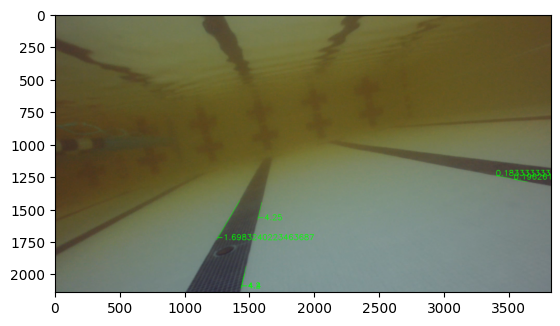

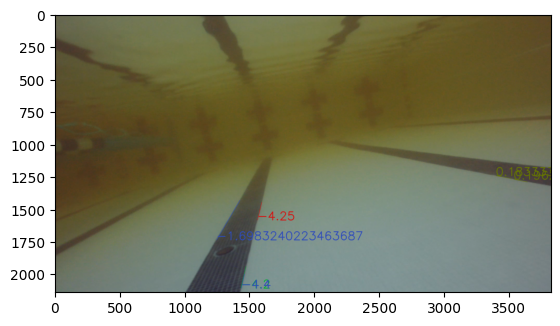

array([[[ 98, 101,  80],
        [ 98, 101,  80],
        [ 98, 101,  80],
        ...,
        [ 89,  71,  38],
        [ 89,  71,  38],
        [ 90,  71,  38]],

       [[ 99, 101,  81],
        [ 99, 101,  81],
        [ 99, 101,  81],
        ...,
        [ 88,  71,  38],
        [ 88,  71,  38],
        [ 89,  71,  38]],

       [[ 99, 102,  81],
        [100, 102,  81],
        [100, 102,  81],
        ...,
        [ 87,  71,  38],
        [ 88,  71,  38],
        [ 88,  71,  39]],

       ...,

       [[101, 114, 104],
        [101, 115, 104],
        [102, 116, 105],
        ...,
        [115, 126, 130],
        [115, 126, 130],
        [115, 126, 130]],

       [[101, 115, 104],
        [101, 115, 105],
        [102, 116, 105],
        ...,
        [116, 127, 130],
        [116, 127, 130],
        [116, 127, 130]],

       [[102, 115, 104],
        [102, 115, 105],
        [102, 116, 106],
        ...,
        [116, 127, 131],
        [116, 127, 131],
        [116, 127, 131]]

In [75]:
img = cv2.imread('lanes.png').copy()
#lines = detect_lines(img, 35, 65, 3, 150, 15)
lines = detect_lines(img, 20, 50, 3, 100, 15)
draw_lines(img, lines)

img2 = cv2.imread('lanes.png').copy()

lanes = detect_lanes(lines)
draw_lanes(img2, lanes)